In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import pandas as pd
import json

# Load the JSON file
file_path = '../datasets/osdb_3min_allSeizures.json'  # Replace with your JSON file path
with open(file_path, 'r') as file:
    raw_json = json.load(file)
    
# Flatten the JSON and extract relevant fields
flattened_data = []

for attribute in raw_json:
    user_id = attribute.get('userId', None)
    datapoints = attribute.get('datapoints', [])

    for point in datapoints:
        event_id = point.get('eventId', None)
        hr = point.get('hr', [])
        o2Sat = point.get('o2Sat', [])
        rawData = point.get('rawData', [])
        rawData3D = point.get('rawData3D', [])
        # Append every datapoint as a row
        flattened_data.append({
            'eventId': event_id,
            'userId': user_id,
            'hr': hr,
            'o2Sat': o2Sat,
            'rawData': rawData,
            'rawData3D': rawData3D,

        })
        
# Create a DataFrame
df_sensordata = pd.DataFrame(flattened_data)
df_sensordata.to_csv('sensordata.csv', index=False)

# Display the DataFrame
df_sensordata.head()

,eventId,userId,hr,o2Sat,rawData,rawData3D
0,407,39,67,-1,"[1496, 1480, 1500, 1492, 1496, 1484, 1500, 149...",[]
1,407,39,67,-1,"[1492, 1508, 1496, 1476, 1484, 1476, 1496, 150...",[]
2,407,39,68,-1,"[1488, 1496, 1484, 1492, 1492, 1508, 1504, 148...",[]
3,407,39,69,-1,"[1488, 1476, 1480, 1504, 1496, 1508, 1484, 148...",[]
4,407,39,69,-1,"[1504, 1488, 1504, 1492, 1484, 1500, 1496, 149...",[]


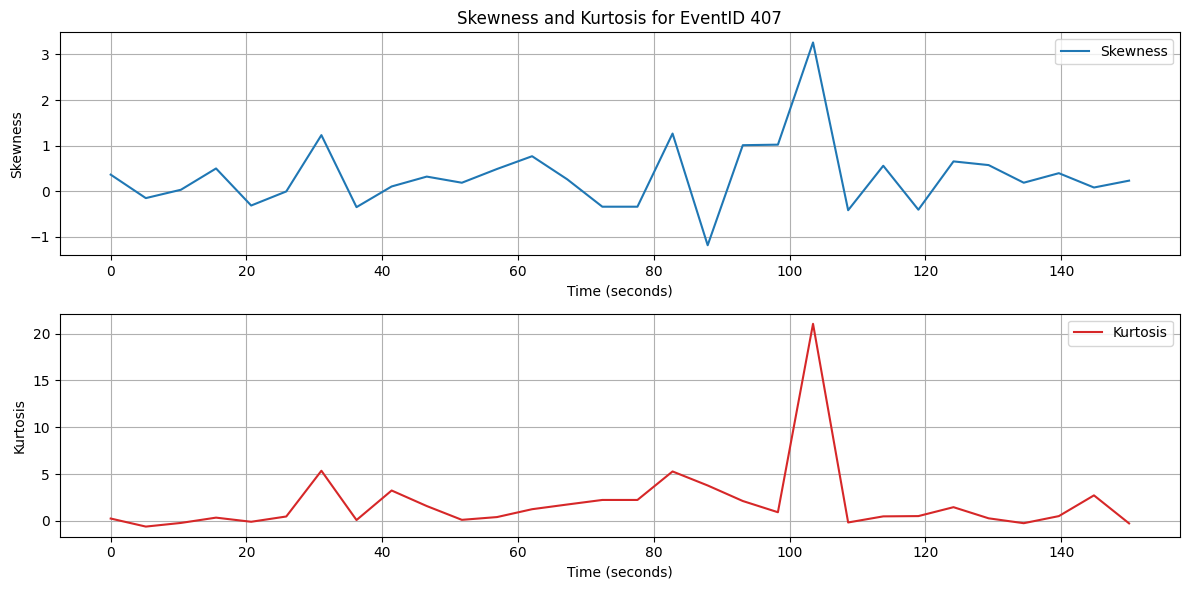

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Filter rows for eventId 407
event_id = 407
filtered_data = df_sensordata[df_sensordata['eventId'] == event_id]

# Total number of rows for the event
num_rows = len(filtered_data)

# Lists to store skewness and kurtosis values for each row
skewness_values = []
kurtosis_values = []

# Compute skewness and kurtosis for each row
for i in range(num_rows):
    # Extract raw data for the current row
    row_data = filtered_data.iloc[i]['rawData']
    
    # Compute skewness and kurtosis for the current row
    skewness_values.append(skew(row_data))
    kurtosis_values.append(kurtosis(row_data))

# Generate the time axis for plotting
time_axis = np.linspace(0, num_rows * 5, num_rows)

# Plot skewness and kurtosis values
plt.figure(figsize=(12, 6))

# Plot skewness
plt.subplot(2, 1, 1)
plt.plot(time_axis, skewness_values, label="Skewness", color='tab:blue')
plt.title(f"Skewness and Kurtosis for EventID {event_id}")
plt.xlabel("Time (seconds)")
plt.ylabel("Skewness")
plt.legend()
plt.grid()

# Plot kurtosis
plt.subplot(2, 1, 2)
plt.plot(time_axis, kurtosis_values, label="Kurtosis", color='tab:red')
plt.xlabel("Time (seconds)")
plt.ylabel("Kurtosis")
plt.legend()
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()


## 📊 **Skewness and Kurtosis Analysis for Sensor Data**  

- This notebook demonstrates how to process **OSDB accelerometer data** by calculating **skewness** and **kurtosis** for each **5-second window** of raw sensor data. The analysis highlights patterns and anomalies over time, providing insight into the distribution of sensor signals during an event.

---

### 📝 **Code Explanation**  

- **📂 Data Loading**: The sensor data is loaded from a **JSON file**, then flattened to extract relevant fields, including **userId**, **eventId**, **heart rate (hr)**, **oxygen saturation (o2Sat)**, **rawData**, and **rawData3D**. This data is stored in a **Pandas DataFrame** for further analysis.  

- **📉 Statistical Measures**: **Skewness** and **kurtosis** are statistical measures that describe the **asymmetry** and **peakedness** of the data distribution. These measures are computed for each **rawData** row, and the results are visualised over time for a specific event (Event ID: 407).
  
    - **⚖️ Skewness**: Measures the **asymmetry** of the data distribution. A positive skew indicates a longer tail on the right, while a negative skew shows a longer tail on the left.  
    - **📏 Kurtosis**: Measures the "tailedness" of the data distribution. High kurtosis indicates a data distribution with **heavy tails** (outliers), while low kurtosis suggests a more **uniform distribution**.
    
- The analysis focuses on the **rawData** for each event, and the **skewness** and **kurtosis** values are plotted over time, providing a **time-based view** of the signal's statistical properties.
  
    - **⏳ Time Axis**: The x-axis represents time, with each point corresponding to a **5-second window** of sensor data.
    - **📈 Visualisation**: The results are plotted as two subplots: one for skewness and one for kurtosis, allowing easy comparison and identification of trends or anomalies over time.

---

### 💡 **How It Works**  

- **1️⃣ Step 1**: Load the raw sensor data and flatten it into a structured format.  
- **2️⃣ Step 2**: For each event, calculate **skewness** and **kurtosis** for the **rawData** of each 5-second window.  
- **3️⃣ Step 3**: Plot the **skewness** and **kurtosis** values over time for visual analysis.  


# 👤 Author  
Developed for the Open Seizure Database by **Jamie Pordoy**.